# Linear Regression for price prediction of car

In [16]:
#import library
import pandas as pd       #for creating dataframe

In [17]:
#read csv file and create dataframe
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv')

In [18]:
#display top 5 record
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
#use info function to find datatypes , count  and null or non-null values from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [20]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.

Note: you may need to restart the kernel to use updated packages.



### Here we use missingno library for visualization of data

In [21]:
import missingno as msno

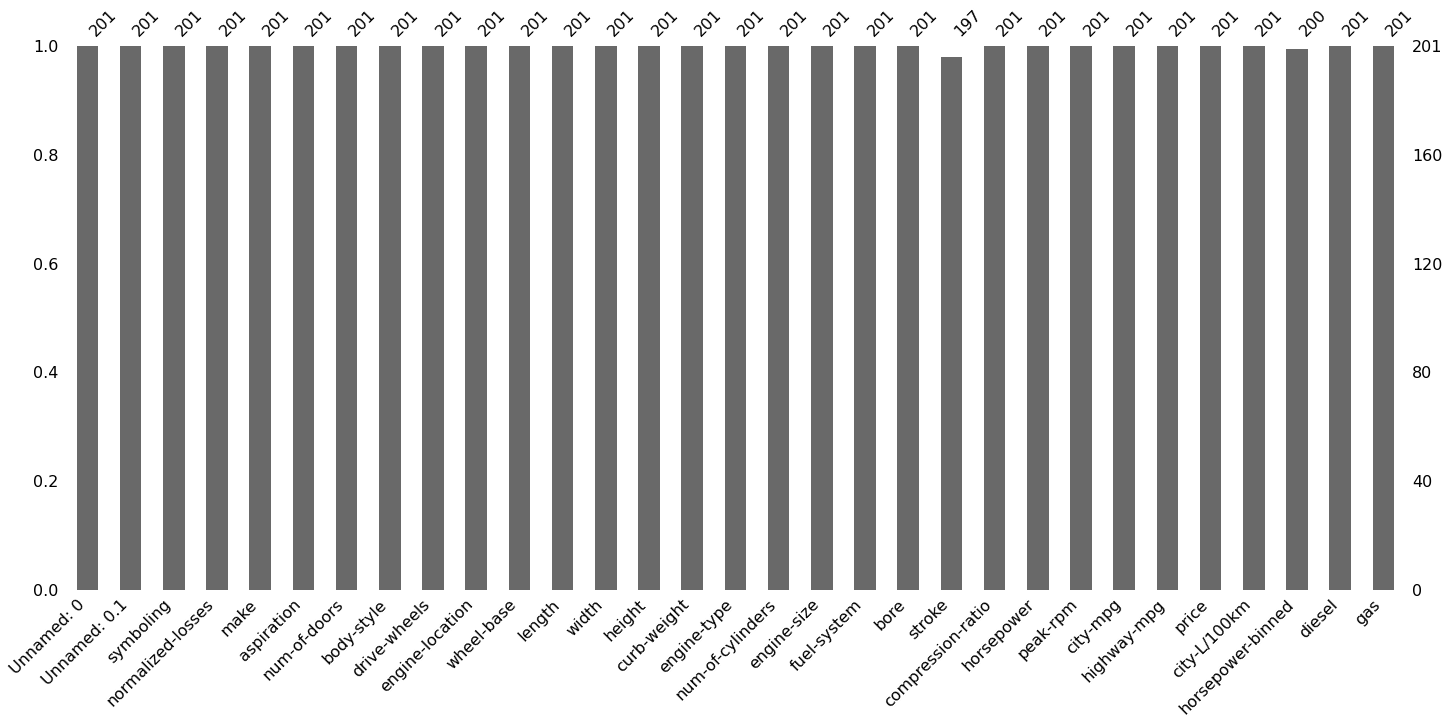

In [22]:
msno.bar(df)

In [74]:
#Describe dataframe
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,...,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,...,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,...,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,...,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [77]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Here we find correlation between price and all other features

In [25]:
df[['price','normalized-losses']].corr()

,price,normalized-losses
price,1.000000,0.133999
normalized-losses,0.133999,1.000000


In [26]:
df[['price','horsepower']].corr()

,price,horsepower
price,1.000000,0.809575
horsepower,0.809575,1.000000


In [27]:
df[['price','peak-rpm']].corr()

,price,peak-rpm
price,1.000000,-0.101616
peak-rpm,-0.101616,1.000000


In [28]:
df[['price','city-mpg']].corr()

,price,city-mpg
price,1.000000,-0.686571
city-mpg,-0.686571,1.000000


In [29]:
df[['price','highway-mpg']].corr()

,price,highway-mpg
price,1.000000,-0.704692
highway-mpg,-0.704692,1.000000


In [30]:
df[['price','city-L/100km']].corr()

,price,city-L/100km
price,1.000000,0.789898
city-L/100km,0.789898,1.000000


### Simple Linear Regression

In [78]:
#import validation function for spliting dataframe into train and test variables
from sklearn.model_selection import train_test_split

In [79]:
y_data = df['price']                 #Assigning a dependent feature to y_data variable
x_data = df.drop('price', axis=1)     #Assigning a independent feature to x_data variable
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state = 1)

In [80]:
#import liner_regression for model formation 
from sklearn.linear_model import LinearRegression 

In [81]:
model = LinearRegression()                   #create object of linearRegression function
model.fit(x_train[['horsepower']],y_train)   #train model with one dependent and one independent features
model.score(x_test[['horsepower']], y_test)  #find the coefficient of determinination for test data

0.3635875575078824

In [82]:
model.score(x_train[['horsepower']], y_train)  #find the coefficient of determinination for train data

0.6619724197515103

###### Conclusion :- Here we observe that coefficient of determinination of model is less. so model does not able to predict approximate or accurate value of price for given data. 

## Multiple Linear Regression

### train model with more than one independent variables and one dependent variable

In [83]:
model.fit(x_train[['normalized-losses','horsepower','wheel-base','engine-size']],y_train) 

LinearRegression()

In [84]:
model.score(x_train[['normalized-losses','horsepower','wheel-base','engine-size']],y_train) #find the coefficient of determinination for train data

0.8140476794540593

### train model with more than one independent variables and one dependent variable

In [85]:
model.fit(x_train[['normalized-losses','horsepower','wheel-base','engine-size','city-L/100km','length','width','height']],y_train)#train model with more than one independent variables and one dependent variable

LinearRegression()

In [86]:
model.score(x_train[['normalized-losses','horsepower','wheel-base','engine-size','city-L/100km','length','width','height']],y_train)#find the coefficient of determinination for train data

0.830227478725134

In [87]:
model.score(x_test[['normalized-losses','horsepower','wheel-base','engine-size','city-L/100km','length','width','height']],y_test)#find the coefficient of determinination for test data

0.6356153636575436

In [88]:
#import  cross validation function for spliting dataframe into train and test variables
from sklearn.model_selection import cross_val_score

In [89]:
Rcross = cross_val_score(model, x_data[['horsepower']], y_data, cv=4) #split data into 4 parts

In [90]:
Rcross  #it displays score of 4 parts

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [91]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std()) #it displays mean and standard deviation

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [92]:
-1 * cross_val_score(model,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

###### Conclusion :- Here we observe that coefficient of determinination of multiple linear regression model is greater than simple linear regression. so model will predict approximate or accurate value of price for given data as compare to model of simple linear regression.